In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import numpy as np
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt

In [9]:
#read data 
data = pd.read_csv('housing.csv')
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
data.fillna(method='bfill',inplace=True)
data.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
data_list=data['total_rooms'].head(13)
data_list

0      880.0
1     7099.0
2     1467.0
3     1274.0
4     1627.0
5      919.0
6     2535.0
7     3104.0
8     2555.0
9     3549.0
10    2202.0
11    3503.0
12    2491.0
Name: total_rooms, dtype: float64

In [18]:
X = data.iloc[:, 0:4].values  
y = data.iloc[:, 4].values  

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [20]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)
y_pred

array([435.33 , 488.215, 630.22 , ..., 367.52 , 462.925, 364.43 ])

In [26]:
y_pred[0:25]

array([ 435.33 ,  488.215,  630.22 ,  180.55 ,  452.66 ,  138.52 ,
        261.085,  409.39 , 1361.225,  163.5  ,  348.78 ,  350.34 ,
        361.81 ,  255.59 ,  184.72 ,  490.645,  731.   ,  431.34 ,
        466.415,  892.555,  670.825,  265.99 ,  757.605,  255.07 ,
        499.43 ])

In [73]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 89.59512298415005
Mean Squared Error: 22308.580510875665
Root Mean Squared Error: 149.36057214297108


In [74]:
    rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
    rf.fit(X_train, y_train)
#    pickl='RandomForest.pickle'
#    pickle.dump(rf,open(pickl,'wb'))
    
print("Score of Random Forest Regression: %.2f" % rf.score(X_test,y_test))

Score of Random Forest Regression: 0.87


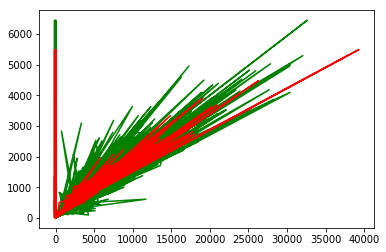

In [81]:
plt.plot(X_train,y_train,'g')
plt.plot(X_test,y_pred,'r')
plt.show()